In [481]:
# Kevin Roa
# kar180005
# CS 4375 Intro to ML

from cvxopt import matrix, solvers, spmatrix
import numpy as np
import matplotlib.pyplot as plt
from math import *

def calc_Q_p_G_h_sep(data):
#     Q = spmatrix(2.0, range(3), range(3))
    Q = matrix([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (3,3))
    Q[0,0] = 2
    Q[1,1] = 2
    p = matrix([0.0, 0.0, 0.0], (3,1))
    G = []
    h = []
    for items in data:
        row = []
        if items[2] == 1:
            row.extend([-1 * item for item in items[:2]])
            row.append(-1)
            G.append(row)
            h.append(-1.0)
        else:
            row.extend(items[:2])
            row.append(1)
            G.append(row)
            h.append(-1.0)
    #print G
    G = matrix(G).trans()
    h = matrix(h)
    print(Q, p)
    print(G, h)
    print(type(G))
    return Q, p, G, h

def calc_Q_p_G_h_nonsep(data, c):
    size = 3 + len(data)
    Q = matrix(np.zeros(size*size), (size, size))
    Q[0,0] = 2
    Q[1,1] = 2
    
    zs = np.full((1, 3), 0.0)
    cs = np.full((1, size - 3), c)
    
    p = matrix(np.append(zs, cs), (size, 1))
    G = []
    h = []
    for items in data:
        row = []
        if items[2] == 1:
            row.extend([-1 * item for item in items[:2]])
            row.append(-1)
            G.append(row)
            h.append(-1.0)
        else:
            row.extend(items[:2])
            row.append(1)
            G.append(row)
            h.append(-1.0)
            
    G = matrix(G).trans()
               
    diag = np.diag(np.full(size - 3, -1.0))
    z = np.full((size - 3, 3), 0.0)
    G = np.append(G, diag, axis=1)
    z = np.append(z, diag, axis=1)
    G = np.concatenate((G, z))
    G = matrix(G)
               
    for items in data:
        h.append(0)
               
    h = matrix(h)
    
    A = matrix(np.full((1, size), 1.0))
    b = matrix([1.0])
    print(Q, p, G, h, A, b)
    return Q, p, G, h, A, b
    
def calc_Q_p_G_h_nonsep_5basis(data, c):
    size = 6 + len(data)
    Q = matrix(np.zeros(size*size), (size, size))
    Q[0,0] = 2
    Q[1,1] = 2
    Q[2,2] = 2
    Q[3,3] = 2
    Q[4,4] = 2
    
    zs = np.full((1, 6), 0.0)
    cs = np.full((1, size - 6), c)
    
    p = matrix(np.append(zs, cs), (size, 1))
    G = []
    h = []
    for items in data:
        row = []
        if items[2] == 1:
            row.extend([-1 * item for item in items[:2]])
            row.append(-1 * items[0]*items[0])
            row.append(-1 * items[1]*items[1])
            row.append(-1 * items[0]*items[1])
            row.append(-1)
            G.append(row)
            h.append(-1.0)
        else:
            row.extend(items[:2])
            row.append(items[0]*items[0])
            row.append(items[1]*items[1])
            row.append(items[0]*items[1])
            row.append(1)
            G.append(row)
            h.append(-1.0)
            
    G = matrix(G).trans()
               
    diag = np.diag(np.full(size - 6, -1.0))
    z = np.full((size - 6, 6), 0.0)
    G = np.append(G, diag, axis=1)
    z = np.append(z, diag, axis=1)
    G = np.concatenate((G, z))
    G = matrix(G)
               
    for items in data:
        h.append(0)
               
    h = matrix(h)
    
    A = matrix(np.full((1, size), 1.0))
    b = matrix([1.0])
    print('Q\n', Q,'p\n', p,'G\n', G,'h\n', h,'A\n', A,'b\n', b)
    return Q, p, G, h, A, b
    
def plot(data, w1, w2, b, sol, predict):
    ### suppose you have obtained sol['x'] from CVXOPT QP minimization
    x = [item[0] for item in data if item[2] == 1]
    y = [item[1] for item in data if item[2] == 1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='r')
    x = [item[0] for item in data if item[2] == -1]
    y = [item[1] for item in data if item[2] == -1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='b')
    x = [item[0] for item in data]
    y = [item[1] for item in data]
    plt.scatter(x, y, s=40, facecolors='none', edgecolors='k')
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]

    print('w: {0}; b: {1} \n'.format([w1,w2], b))

    print('w.x + b > 0 for positive class')
    print('w.x + b < 0 for negative class \n') 
    
    margin = 2/(sqrt(w1*w1 + w2*w2))
    print('Margin size: ', margin)
    
    
    sv = [item for item in data if (isclose(abs(w1*item[0] + w2*item[1] + b), 1, rel_tol=1e-4))]
    print('Support vectors:', sv)
    
    for item in predict:
        prediction = w1*item[0] + w2*item[1] + b
        if prediction > 0: item[2] = 1
        else: item[2] = -1
    
    x = [item[0] for item in predict if item[2] == 1]
    y = [item[1] for item in predict if item[2] == 1]
    plt.scatter(x, y, s=80, facecolors='none', c='r', marker='x')
    x = [item[0] for item in predict if item[2] == -1]
    y = [item[1] for item in predict if item[2] == -1]
    plt.scatter(x, y, s=80, facecolors='none', c='b', marker='x')
    
    print('Prediction: ', predict)

    x = [-1, 8]

    y = [(w1 * x[i] + b)/(-1 * w2) for i in range(2)]

    
    plt.plot(x, y, color='red')

    y = [(w1 * x[i] + b - 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')

    y = [(w1 * x[i] + b + 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid()

    plt.gcf().set_size_inches(5, 5)

    plt.show()

def svm_proc_sep(data, predict):
    Q, p, G, h = calc_Q_p_G_h_sep(data)
    sol=solvers.qp(Q, p, G, h)
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]
    print('\n\nw1 = {0}; w2 = {1}; b = {2}'.format(w1, w2, b))
    plot(data, w1, w2, b, sol, predict)
    
def svm_proc_nonsep(data, predict, c):
    Q, p, G, h, A, b = calc_Q_p_G_h_nonsep(data, c)
    sol=solvers.qp(Q, p, G, h)
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]
    print('\n\nw1 = {0}; w2 = {1}; b = {2}'.format(w1, w2, b))
    plot(data, w1, w2, b, sol, predict)
    
def svm_proc_nonsep_5basis(data, predict, c):
    Q, p, G, h, A, b = calc_Q_p_G_h_nonsep_5basis(data, c)
    sol=solvers.qp(Q, p, G, h)
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    w3 = sol['x'][2]
    w4 = sol['x'][3]
    w5 = sol['x'][4]
    b  = sol['x'][5]
    print('\n\nw1 = {0}; \nw2 = {1}; \nw3 = {2}; \nw4 = {3}; \nw5 = {4}; \nb = {5}'.format(w1, w2, w3, w4, w5, b))
    
    w = [item for item in sol['x'][0:5]]
    
    margin = 2/sqrt(np.dot(w, w))
    print('Margin = ', margin)
    
    sv = []
    for item in data:
        kernel = [sqrt(2)*item[0], sqrt(2)*item[1], item[0]*item[0], item[1]*item[1], 1]
        if(isclose(abs(np.dot(w, kernel) + b), 1, rel_tol=1e-2)):
            sv.append(item)
    print('Support vectors = ', sv)
    
    for item in predict:
        kernel = [sqrt(2)*item[0], sqrt(2)*item[1], item[0]*item[0], item[1]*item[1], 1]
        prediction = np.dot(w, kernel) + b
        print(prediction)
        if prediction > 0: item[2] = 1
        else: item[2] = -1
    print('Prediction = ', predict)
#     plot(data, w1, w2, b, sol, predict)

[ 2.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  2.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

[-6.00e+00 -2.00e+00 -1.00e+00]
[-6.00e+00 -4.00e+00 -1.00e+00]
[ 2.00e+00  4.00e+00  1.00e+00]
[ 3.00e+00  6.00e+00  1.00e+00]
 [-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]

<class 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0:  1.9345e-01  8.2455e-01  5e+00  1e+00  8e+00
 1:  7.8525e-01  1.5349e-01  6e-01  3e-16  4e-15
 2:  3.4766e-01  2.9190e-01  6e-02  3e-16  4e-15
 3:  3.1611e-01  3.1202e-01  4e-03  2e-16  1e-15
 4:  3.1265e-01  3.1250e-01  2e-04  2e-16  9e-14
 5:  3.1250e-01  3.1250e-01  2e-06  2e-16  8e-14
 6:  3.1250e-01  3.1250e-01  2e-08  2e-16  2e-13
Optimal solution found.


w1 = 0.5000000595950868; w2 = -0.24999991213623302; b = -1.0000007071691053
w: [0.5000000595950868, -0.24999991213623302]; b: -1.0000007071691053 

w.x + b > 0 for positive class
w.x + b < 0 for negative class 

Margin size:  3.57770867433819

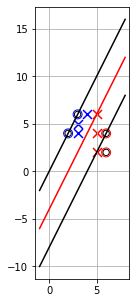

In [482]:
# Question 1-2
data = [[6.0, 2, 1], [6, 4, 1], [2, 4, -1], [3, 6, -1]]
predict = [[3.0,5,0], [3,4,0],[4,6,0],[5,4,0],[5,2,0],[5,6,0]]
svm_proc_sep(data, predict)

[ 2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
 [-3.00e+00 -5.00e+00 -1.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-5.00e+00 -3.00e+00 -1.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00 ... ]
[-6.00e+00 -6.00e+00 -1.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00 ... ]
[ 5.00e+00  6.00e+00  1.00e+00  0.00e+00  0.00e+00  0.0

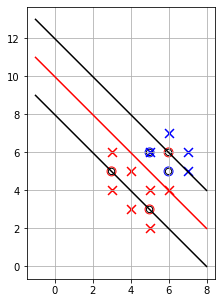

In [483]:
# Question 3-4
data = [[3.0, 5, 1], [5, 3, 1], [6, 6, 1], [5, 6, -1], [6, 5, -1]]
predict = [[3,4,0],[3,6,0],[4,3,0],[4,5,0],[5,4,0],[5,2,0],[5,6,0],[6,4,0],[6,7,0],[7,5,0],[7,6,0]]
c = 1
svm_proc_nonsep(data, predict, c)

In [484]:
#Question 5
data = [[3.0, 5, 1], [5, 3, 1], [6, 6, 1], [5, 6, -1], [6, 5, -1]]
predict = [[3,4,0],[3,6,0],[4,3,0],[4,5,0],[5,4,0],[5,2,0],[5,6,0],[6,4,0],[6,7,0],[7,5,0],[7,6,0]]
c = 1000
svm_proc_nonsep_5basis(data, predict, c)

Q
 [ 2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  2.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  2.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
 p
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 1.00e+03]
[ 1.00e+03]
[ 1.00e+03]
[ 1.00e+03]
[ 1.00e+03]
 G
 [-3.00e+00